# CopoFi Take Away Data Science Interview
## Goal: 
    Using the provided dataset, extract valuable insights from the Insider Airbnb dataset. 
        (http://data.insideairbnb.com/united-kingdom/england/london/2019-07-10/data/listings.csv.gz)
        Be sure to capture the following processes:
            1. Exploratory data analysis
            2. Feature Engineering
            3. Model training/testing

### Executive Summary

This challenge was a supervised learning task, specifically, a regression task. Given a data set with the dependent variable (listing price), the goal was to map out the patterns between independent variables and  the dependent variable. 

The results showed that ML is applicable to this challenge, with the best model having a Mean Absolute Error of 26.66 against a baseline MAE of 53.36.

Results from feature importance showed that accomodates is by far the most powerful predictor of price. 

Model interpretability using LIME was attempted. The goal was to compare a wrong prediction and a right prediction and see what features contribute the most to predicting price. 

This analysis was conducted from a none-domain expert perspective. As such some decisions made might differ with decisions a domain expert would typically make.

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer as Imputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# LIME for explaining predictions
import lime 
import lime.lime_tabular

## Data Formatting and Cleaning

In [2]:
#Loading the dataset
df = pd.read_csv('C:/Users/Mwend/OneDrive/2019/CopoFI Data Science Interview/Dataset/listings/listings.csv', low_memory = False)

# Display up to 106 columns of a dataframe - Which is the total number of columns in dataset
pd.set_option('display.max_columns', len(df))

In [3]:
#Listing first 5 data records
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20190710134553,2019-07-11,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,NaN,NaN,https://a0.muscache.com/im/pictures/ffb507b7-9...,NaN,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,86%,NaN,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,4.0,4.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Islington, Greater London, United Kingdom",LB of Islington,Islington,NaN,Islington,Greater London,N4 3,London,"Islington, United Kingdom",GB,United Kingdom,51.56802,-0.11121,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",538.0,$65.00,$333.00,"$1,176.00",$100.00,$15.00,1,$15.00,1,29,1,1,29,29,1.0,29.0,2 months ago,t,19,42,72,347,2019-07-11,16,2,2010-08-18,2019-06-10,96.0,9.0,10.0,9.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,f,f,3,1,2,0,0.15
1,15400,https://www.airbnb.com/rooms/15400,20190710134553,2019-07-11,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,NaN,NaN,https://a0.muscache.com/im/pictures/428392/462...,NaN,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,100%,NaN,t,https://a0.muscache.com/i

In [4]:
#Printing out all the columns in the dataset
for column in df.columns:
    print(column)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

In [5]:
#Dataset has 83,850 records and 106 features in the dataset
df.shape

(83850, 106)

In [6]:
#Checking the datatypes in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83850 entries, 0 to 83849
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 67.8+ MB


In [7]:
#Narrowing down to the object datatypes
#Need to know which columns should remain and which should be removed
object_columns = df.select_dtypes(include = object)
object_columns.head()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/13913,2019-07-11,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,https://a0.muscache.com/im/pictures/ffb507b7-9...,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,86%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,"['email', 'phone', 'facebook', 'reviews']",t,f,"Islington, Greater London, United Kingdom",LB of Islington,Islington,Islington,Greater London,N4 3,London,"Islington, United Kingdom",GB,United Kingdom,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",$65.00,$333.00,"$1,176.00",$100.00,$15.00,$15.00,2 months ago,t,2019-07-11,2010-08-18,2019-06-10,f,NaN,NaN,f,f,moderate,f,f
1,https://www.airbnb.com/rooms/15400,2019-07-11,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,https://a0.muscache.com/im/pictures/428392/462...,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,100%,t,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"London, United Kingdom",RB of Kensington and Chelsea,Kensington and Chelsea,London,NaN,SW3,London,"London, United Kingdom",GB,United Kingdom,t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$100.00,$600.00,"$2,250.00",$150.00,$50.00,$0.00,2 months ago,t,2019-07-11,2009-12-21,2019-05-05,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t
2,https://www.airbnb.com/rooms/17402,2019-07-11,Superb 3-Bed/2 Bath & Wifi: Trendy W1,"Open from June 2018 after a 3-year break, we a...",Ready again from June 2018 for bookings after ...,"Open from June 2018 after a 3-year break, we a...",none,"Location, location, location! You won't find b...",This property has new flooring throughout. Gue...,You can walk to tourist London or take numerou...,Full use of whole independent apartment,"Always available by email or phone (before, du...",The apartment benefits from new flooring throu...,https://a0.muscache.com/im/p

In [8]:
#57 columns are non-numerical 
object_columns.shape

(83850, 62)

In [9]:
#Summary statistics of numerical columns - Price column does not appear here. Interesting 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,83850.0,2.134820e+07,1.028356e+07,1.391300e+04,1.364932e+07,2.200927e+07,3.031554e+07,3.658582e+07
scrape_id,83850.0,2.019071e+13,0.000000e+00,2.019071e+13,2.019071e+13,2.019071e+13,2.019071e+13,2.019071e+13
thumbnail_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xl_picture_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,83850.0,7.822874e+07,7.823495e+07,2.010000e+03,1.451736e+07,4.451248e+07,1.325813e+08,2.749791e+08
host_acceptance_rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,83803.0,3.187528e+01,1.728092e+02,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,1.433000e+03
host_total_listings_count,83803.0,3.187528e+01,1.728092e+02,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,1.433000e+03
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Check the data type of column price
df['price'].dtype

#It is a type object

dtype('O')

In [11]:
df['price'].head()

#We need to cast the column to a float. But before that, let's remove the preceding dollar sign. 

0     $65.00
1    $100.00
2    $300.00
3    $175.00
4     $65.00
Name: price, dtype: object

### Manipulating price column

#### Testing out different ways of removing the dollar sign in the price column. Conversion of the column to bytes is the most optimal. 

In [12]:
%timeit df.price.str.replace('$', '')

28.4 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%timeit df.price.apply(lambda x: x.replace('$', ''))

24.1 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
%timeit df.price.apply(lambda x: x.strip('$'))

21.1 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%timeit [x.strip('$') for x in df.price]

20.1 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%timeit np.frombuffer(df.price.values.astype('|S7').tobytes().replace(b'$',b''), dtype='|S6')

3.72 ms ± 422 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
df.price = [x.strip('$') for x in df.price]

In [18]:
df.price.head()

0     65.00
1    100.00
2    300.00
3    175.00
4     65.00
Name: price, dtype: object

In [19]:
df.price = df.price.apply(lambda x: x.replace(',', ''))

In [20]:
#Converting the price column to a numerical column
df.price = df.price.astype(float)

In [21]:
#Checking data type of price column
df.price.dtype

dtype('float64')

### Manipulating Security deposit column. 

Casting the column to float by removing the $ sign. I make the assumption of a missing security deposit value to mean 0 deposit. 

### Manipulating Cleaning fee column

### Manipulating Extra people column

In [22]:
#Function for transforming string columns into numeric columns

def string_to_numeric(data):
    data = data.str.replace('$', '')
    data = data.str.replace(',', '')
    data = data.str.replace('%', '')
    
    data = data.astype(float)
    
    return data

In [23]:
df.security_deposit = string_to_numeric(df.security_deposit)
df.extra_people = string_to_numeric(df.extra_people)
df.cleaning_fee = string_to_numeric(df.cleaning_fee)
df.weekly_price = string_to_numeric(df.weekly_price)
df.monthly_price = string_to_numeric(df.monthly_price)
df.host_response_rate = string_to_numeric(df.host_response_rate)

In [24]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

In [25]:
object_columns = df.select_dtypes(include = object)
object_columns.head()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,property_type,room_type,bed_type,amenities,calendar_updated,calendar_last_scraped,first_review,last_review,license,jurisdiction_names,cancellation_policy
0,https://www.airbnb.com/rooms/13913,2019-07-11,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,https://a0.muscache.com/im/pictures/ffb507b7-9...,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,"['email', 'phone', 'facebook', 'reviews']","Islington, Greater London, United Kingdom",LB of Islington,Islington,Islington,Greater London,N4 3,London,"Islington, United Kingdom",GB,United Kingdom,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",2 months ago,2019-07-11,2010-08-18,2019-06-10,NaN,NaN,moderate
1,https://www.airbnb.com/rooms/15400,2019-07-11,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,https://a0.muscache.com/im/pictures/428392/462...,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,"['email', 'phone', 'reviews', 'jumio', 'govern...","London, United Kingdom",RB of Kensington and Chelsea,Kensington and Chelsea,London,NaN,SW3,London,"London, United Kingdom",GB,United Kingdom,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",2 months ago,2019-07-11,2009-12-21,2019-05-05,NaN,NaN,strict_14_with_grace_period
2,https://www.airbnb.com/rooms/17402,2019-07-11,Superb 3-Bed/2 Bath & Wifi: Trendy W1,"Open from June 2018 after a 3-year break, we a...",Ready again from June 2018 for bookings after ...,"Open from June 2018 after a 3-year break, we a...",none,"Location, location, location! You won't find b...",This property has new flooring throughout. Gue...,You can walk to tourist London or take numerou...,Full use of whole independent apartment,"Always available by email or phone (before, du...",The apartment benefits from new flooring throu...,https://a0.muscache.com/im/pictures/39d5309d-f...,https://www.airbnb.com/users/show/67564,Liz,2010-01-04,"London, England, United Kingdom",We are Liz and Jack. We manage a number of ho...,within an hour,https://a0.muscache.com/im/users/67564/profile...,https://a0.muscache.com/im/users/67564/profile...,Fitzrovia,"['email', 'phone', 'reviews', 'jumio', 'offlin...","London, Fitzrovia, United Kingdom",Fitzrovia,Westminster,London,Fitzrovia,W1T4BP,London,"London, United Kingdom",GB,United 

In [26]:
#Checking for missing values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The dataset has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [27]:
missing_values_table(df)

The dataset has 106 columns.
There are 54 columns that have missing values.


,Missing Values,% of Total Values
neighbourhood_group_cleansed,83850,100.0
thumbnail_url,83850,100.0
host_acceptance_rate,83850,100.0
xl_picture_url,83850,100.0
medium_url,83850,100.0
jurisdiction_names,83848,100.0
license,83657,99.8
square_feet,83405,99.5
monthly_price,78522,93.6
weekly_price,76365,91.1


In [28]:
#We see that there are columns with alot of missing values. One rule of thumb is that if a column has more than 50% of values 
#missing, we discard it, since chances are it won't be of much help.

missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('\n','We will remove %d columns.' % len(missing_columns))

The dataset has 106 columns.
There are 54 columns that have missing values.

 We will remove 11 columns.


In [29]:
# Drop the columns
df = df.drop(columns = list(missing_columns))

In [30]:
#Lets confirm everything checks out. 
missing_values_table(df)

The dataset has 95 columns.
There are 43 columns that have missing values.


,Missing Values,% of Total Values
access,37455,44.7
host_about,35296,42.1
interaction,35041,41.8
house_rules,35001,41.7
transit,30808,36.7
neighborhood_overview,30454,36.3
security_deposit,29475,35.2
space,25588,30.5
host_response_time,24782,29.6
host_response_rate,24782,29.6


In [31]:
df.shape

(83850, 95)

## Exploratory Data Analysis

The purpose of this step is to find relationships, trends, patterns or anomalies in data.
This process is important because it helps inform modeling decisions such as what independent variables to use to predict the dependent variable.

### Plot of listing price against Airbnb listings

Text(0.5, 1.0, 'Pricing Distribution')

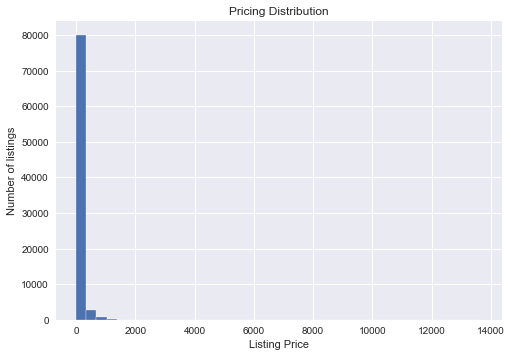

In [32]:
plt.style.use('seaborn')

plt.hist(df.price, bins = 40)
plt.xlabel('Listing Price')
plt.ylabel('Number of listings')
plt.title('Pricing Distribution')

This seems quite suspicious. The graph is skewed with most listings having a low listing price. 

Let's look at the summary statistics of this column.

In [33]:
df.price.describe()

count    83850.000000
mean       121.656303
std        224.900151
min          0.000000
25%         45.000000
50%         81.000000
75%        140.000000
max      13700.000000
Name: price, dtype: float64

There seems to be a discrepancy between the mean, 75% value and the max value.

This seems to be an outlier issue which needs to be dealt with. 

#### Checking for outliers using the definition of extreme outlier, which is:
    Low end extreme outliers are below First Quartile - 3 * Interquartile Range while High end extreme outliers are above Thrid Quartile + 3 /8 Interquartile Range

In [34]:
#Calculating first and third quartile
first_quartile = df.price.describe()['25%']
third_quartile = df.price.describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
df = df[(df.price > (first_quartile - 3 * iqr)) & (df.price < (third_quartile + 3 * iqr))]

Text(0.5, 1.0, 'Pricing Distribution')

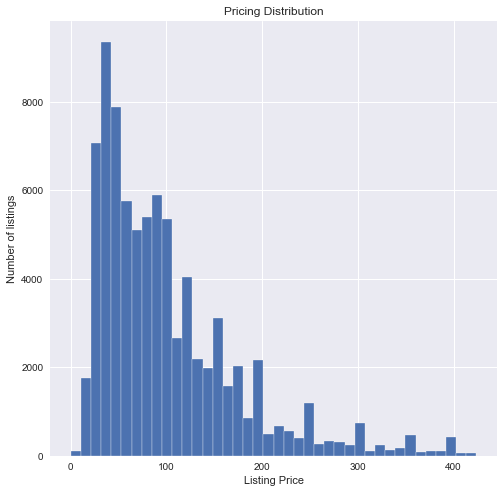

In [35]:
#Histogram after outliers have been removed

figsize(8,8)
plt.hist(df.price, bins = 40)
plt.xlabel('Listing Price')
plt.ylabel('Number of listings')
plt.title('Pricing Distribution')

The data looks much better and follows a normal distribution with a tail to the right, which would ideally represent the natural distribution of Airbnb price listing in London.

### Correlation between Price column and other numerical independent variables

In [36]:
correlations = df.corr()['price'].dropna().sort_values()

In [37]:
correlations.head(10)

longitude                                      -0.120695
calculated_host_listings_count_private_rooms   -0.118324
number_of_reviews_ltm                          -0.107604
review_scores_value                            -0.100848
number_of_reviews                              -0.097560
reviews_per_month                              -0.086627
review_scores_communication                    -0.069132
review_scores_checkin                          -0.063467
calculated_host_listings_count_shared_rooms    -0.055089
review_scores_accuracy                         -0.033841
Name: price, dtype: float64

Independent variables that correlate with the dependent variable are useful to a model because they can be used to predict the dependent variable. 

By using pearson's correlation coefficient, we notice a weak negative correlation between the price column and other columns, while accommodates, bedrooms, bathrooms, beds and guests_includes columns have the strongest positive correlation with price. 

Looking at the correlations, they intuitively make sense with number of bedrooms, bathrooms, guests included etc affecting the price of a listing. 

In [38]:
correlations.tail(10)

host_listings_count                            0.249177
calculated_host_listings_count_entire_homes    0.252624
security_deposit                               0.294659
bathrooms                                      0.368856
guests_included                                0.381021
beds                                           0.492802
bedrooms                                       0.540943
cleaning_fee                                   0.578742
accommodates                                   0.630128
price                                          1.000000
Name: price, dtype: float64

In [39]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'access', 'interaction', 'house_rules', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'ext

In [40]:
df = df.drop(columns = ['name', 'listing_url', 'last_scraped', 'summary', 'space', 'description', 'neighborhood_overview', 
                  'transit', 'access', 'interaction', 'house_rules', 'picture_url', 'host_url', 'host_name', 'host_about',
                  'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'neighbourhood',
                  'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'calendar_updated', 'calendar_last_scraped',
                     'host_location'])

In [41]:
object_columns = df.select_dtypes(include = object)
object_columns.head()

,experiences_offered,host_since,host_response_time,street,neighbourhood_cleansed,zipcode,property_type,room_type,bed_type,amenities,first_review,last_review,cancellation_policy
0,business,2009-11-16,within a few hours,"Islington, Greater London, United Kingdom",Islington,N4 3,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",2010-08-18,2019-06-10,moderate
1,romantic,2009-12-05,within a day,"London, United Kingdom",Kensington and Chelsea,SW3,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",2009-12-21,2019-05-05,strict_14_with_grace_period
2,none,2010-01-04,within an hour,"London, Fitzrovia, United Kingdom",Westminster,W1T4BP,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",2011-03-21,2019-06-19,strict_14_with_grace_period
3,family,2009-09-28,within a day,"London, United Kingdom",Wandsworth,SW11 5GX,Townhouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",2010-11-15,2019-06-08,moderate
4,none,2010-04-03,within a few hours,"Wimbledon, London, United Kingdom",Wandsworth,SW19 6QH,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",El...",2016-03-05,2019-06-22,moderate


### Comparing categorical variables with the dependent column

How do categorical variables affect the price column? in order to answer this question, we need to use a density plot colored by the valued of the categorical variable. They show a desitribution of a single column against the dependent variable. 

In [42]:
experience = df.dropna(subset = ['price'])
experience = experience.experiences_offered.value_counts()
experience = list(experience[experience.values > 100].index)

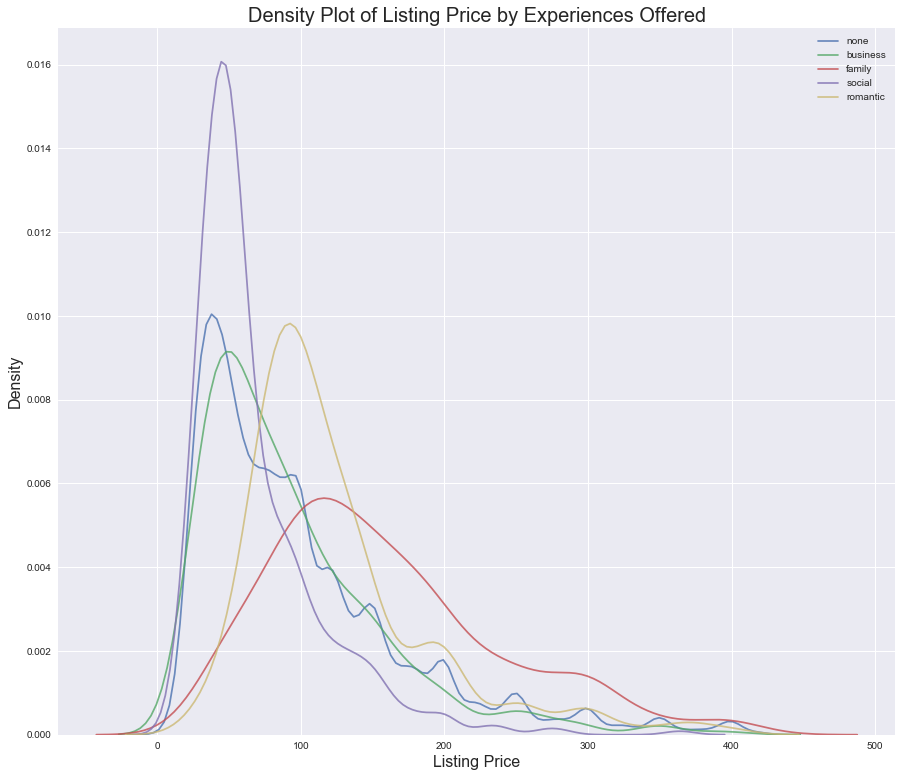

In [43]:
figsize(15, 13)

# Plot each experience
for each_experience in experience:
    # Select an experience
    subset = df[df.experiences_offered == each_experience]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['price'].dropna(),
               label = each_experience, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Listing Price', size = 16); plt.ylabel('Density', size = 16); 
plt.title('Density Plot of Listing Price by Experiences Offered', size = 20);

Experiences offered do seem to have an effect on the listing price of an AirBnb. 

We will include this in our model. 

In [44]:
host_response = df.dropna(subset = ['price'])
host_response = host_response.host_response_time.value_counts()
host_response = list(host_response[host_response.values > 100].index)

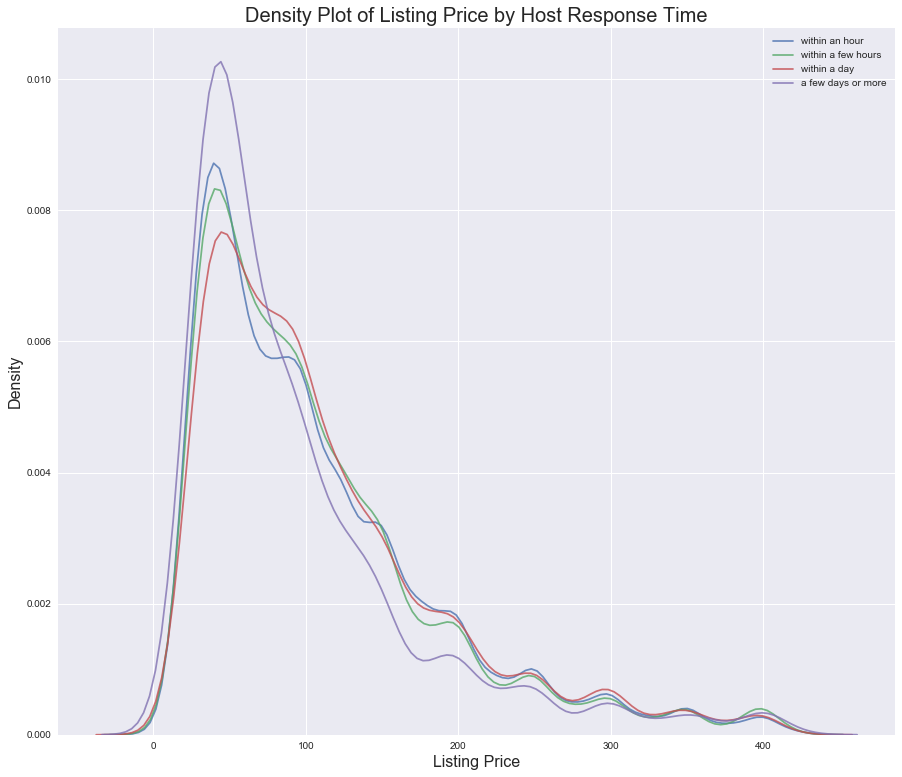

In [45]:
figsize(15, 13)

# Plot each experience
for each_experience in host_response:
    # Select an experience
    subset = df[df.host_response_time == each_experience]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['price'].dropna(),
               label = each_experience, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Listing Price', size = 16); plt.ylabel('Density', size = 16); 
plt.title('Density Plot of Listing Price by Host Response Time', size = 20);

Host Response Time does not seem to have a significant impact on the distribution of listing price. 

However, since there is some noticeable influence, I will include it in the model. 

In [46]:
street_name = df.dropna(subset = ['price'])
street_name = street_name.street.value_counts()
street_name = list(street_name[street_name.values > 100].index)

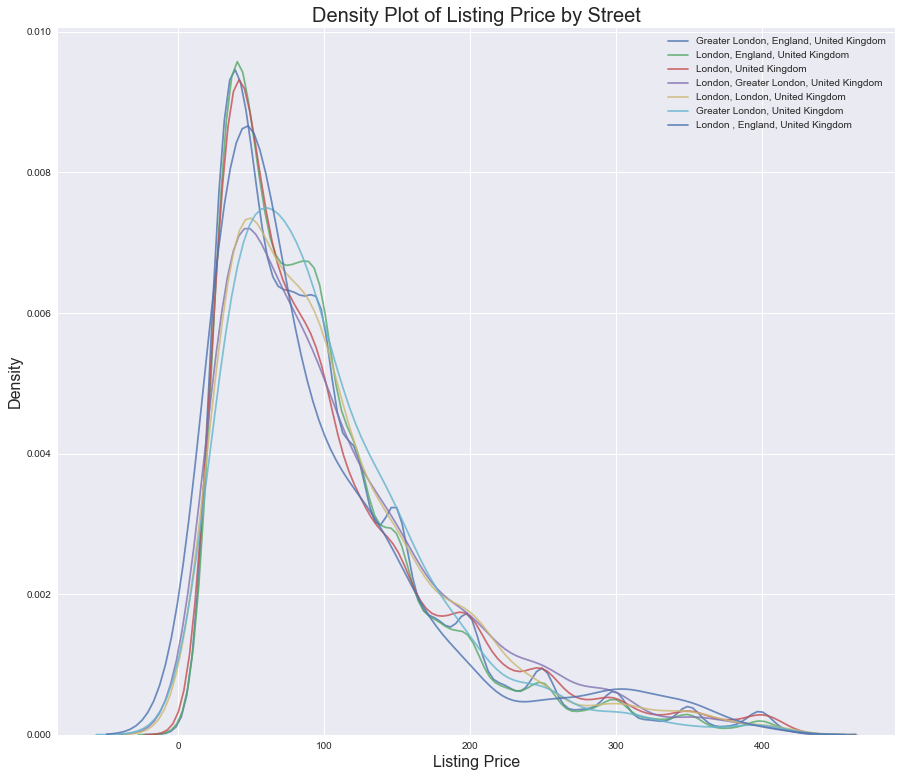

In [47]:
figsize(15, 13)

# Plot each experience
for each_experience in street_name:
    # Select an experience
    subset = df[df.street == each_experience]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['price'].dropna(),
               label = each_experience, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Listing Price', size = 16); plt.ylabel('Density', size = 16); 
plt.title('Density Plot of Listing Price by Street', size = 20);

The street an AirBnb is located in does not seem to influence the price. This most likely is because same streets have been named differently. E.g., Greater London, England, United Kingdon and Greater London United Kinngdom. I will not be including it in the model. 

In [48]:
n_c = df.dropna(subset = ['price'])
n_c = n_c.neighbourhood_cleansed.value_counts()
n_c = list(n_c[n_c.values > 100].index)

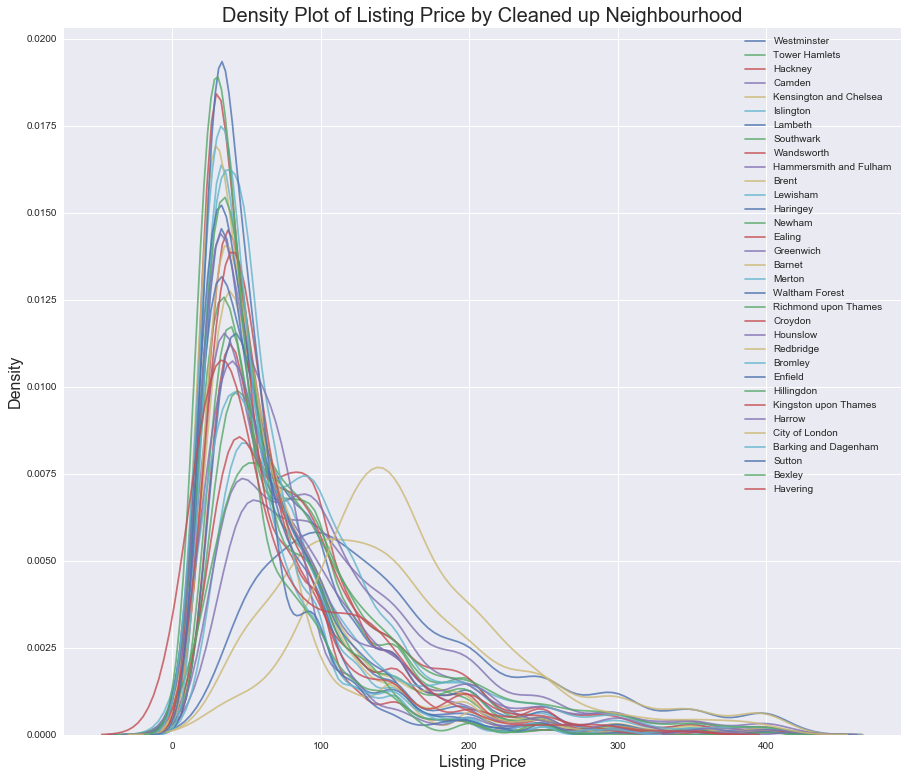

In [49]:
figsize(15, 13)

# Plot each experience
for each_experience in n_c:
    # Select an experience
    subset = df[df.neighbourhood_cleansed == each_experience]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['price'].dropna(),
               label = each_experience, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Listing Price', size = 16); plt.ylabel('Density', size = 16); 
plt.title('Density Plot of Listing Price by Cleaned up Neighbourhood', size = 20);

Neighbourhood does not seem to have a significant influence on pricing. Still I think it is an important column and as such, will include it in the model. 

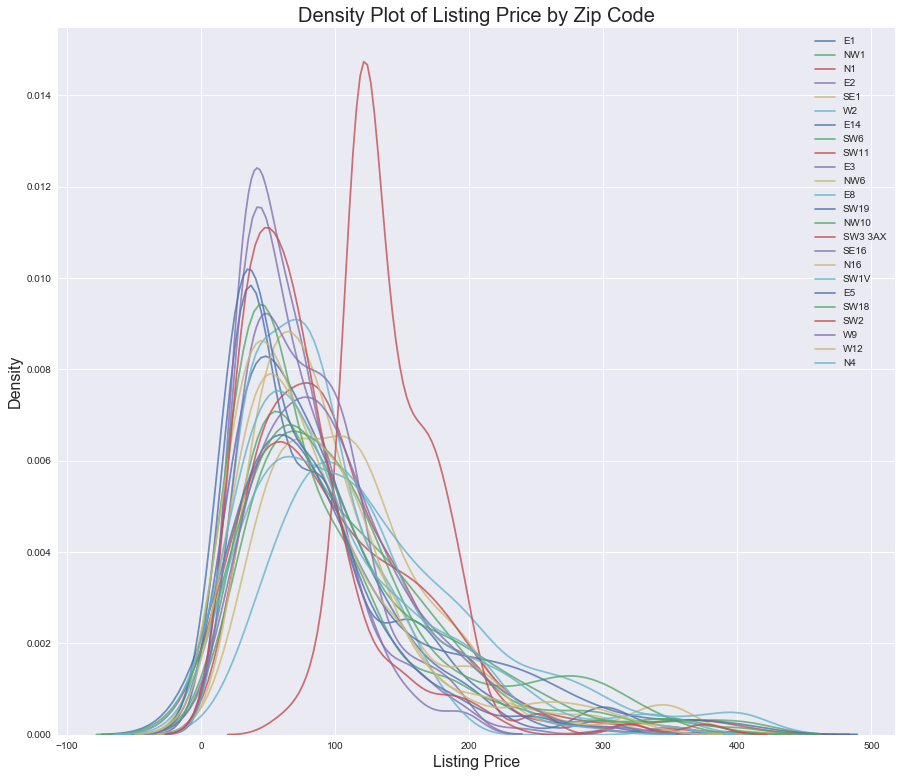

In [50]:
zippy = df.dropna(subset = ['price'])
zippy = zippy.zipcode.value_counts()
zippy = list(zippy[zippy.values > 100].index)

figsize(15, 13)

# Plot each experience
for each_experience in zippy:
    # Select an experience
    subset = df[df.zipcode == each_experience]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['price'].dropna(),
               label = each_experience, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Listing Price', size = 16); plt.ylabel('Density', size = 16); 
plt.title('Density Plot of Listing Price by Zip Code', size = 20);

Some influence of Zip code on pricing is seen. As such, this column will also be included in the model. 

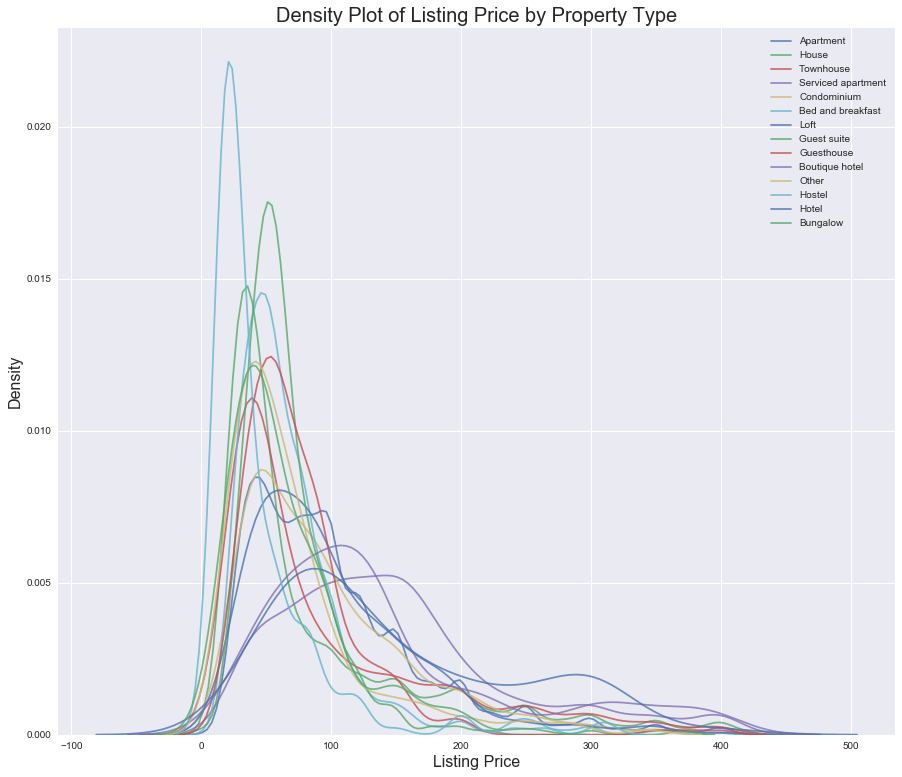

In [51]:
p_type = df.dropna(subset = ['price'])
p_type = p_type.property_type.value_counts()
p_type = list(p_type[p_type.values > 100].index)

figsize(15, 13)

# Plot each experience
for each_experience in p_type:
    # Select an experience
    subset = df[df.property_type == each_experience]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['price'].dropna(),
               label = each_experience, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Listing Price', size = 16); plt.ylabel('Density', size = 16); 
plt.title('Density Plot of Listing Price by Property Type', size = 20);

Property type does seem to influence listing price. This too will be included in the model

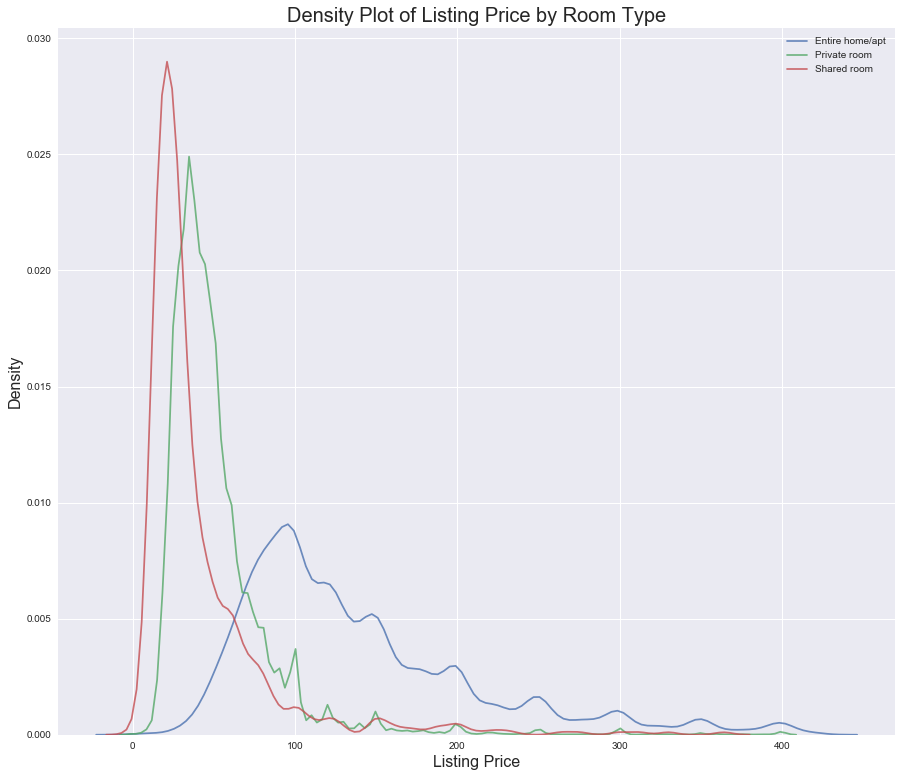

In [52]:
r_type = df.dropna(subset = ['price'])
r_type = r_type.room_type.value_counts()
r_type = list(r_type[r_type.values > 100].index)

figsize(15, 13)

# Plot each experience
for each_experience in r_type:
    # Select an experience
    subset = df[df.room_type == each_experience]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['price'].dropna(),
               label = each_experience, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Listing Price', size = 16); plt.ylabel('Density', size = 16); 
plt.title('Density Plot of Listing Price by Room Type', size = 20);

Room type does influence pricing. This will be included in the model. 

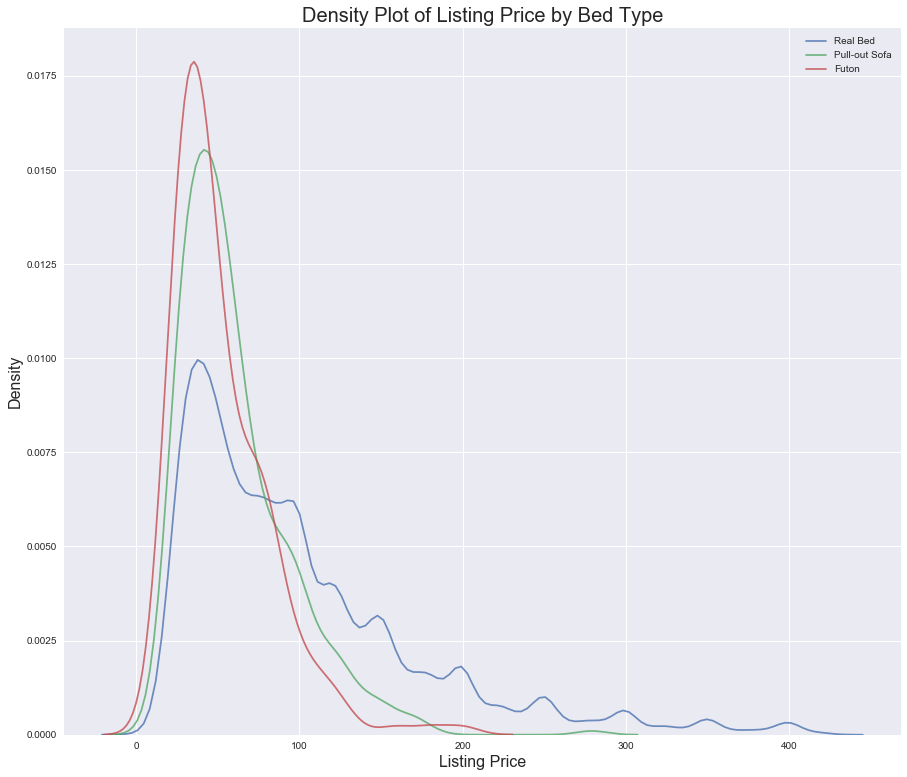

In [53]:
b_type = df.dropna(subset = ['price'])
b_type = b_type.bed_type.value_counts()
b_type = list(b_type[b_type.values > 100].index)

figsize(15, 13)

# Plot each experience
for each_experience in b_type:
    # Select an experience
    subset = df[df.bed_type == each_experience]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['price'].dropna(),
               label = each_experience, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Listing Price', size = 16); plt.ylabel('Density', size = 16); 
plt.title('Density Plot of Listing Price by Bed Type', size = 20);

Bed type does influence the price of a listing. This will be included in the model 

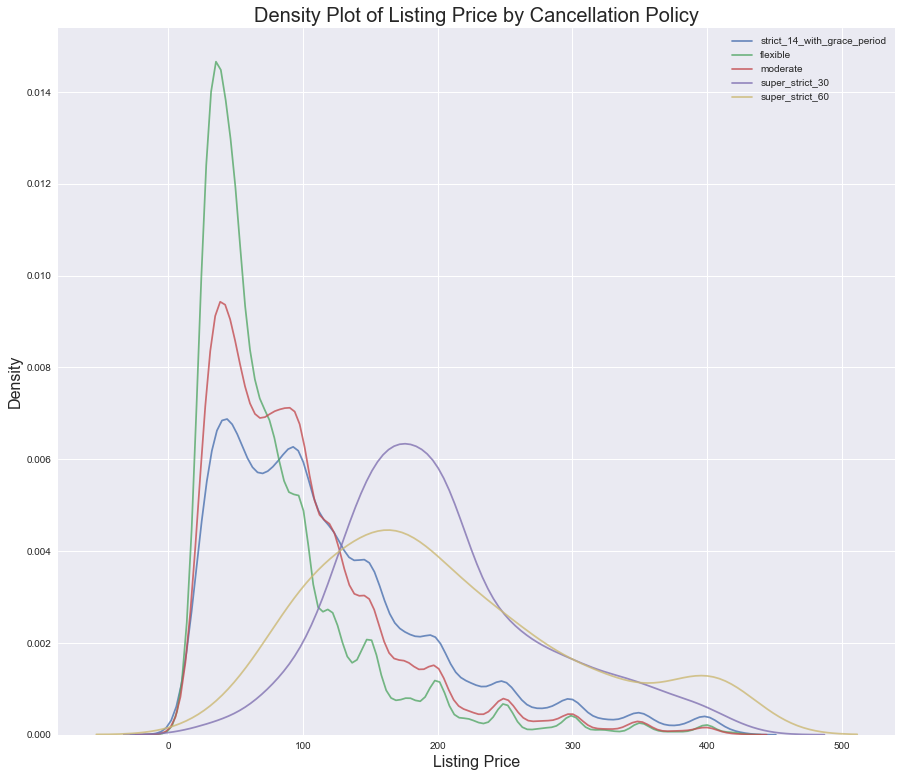

In [54]:
c_policy = df.dropna(subset = ['price'])
c_policy = c_policy.cancellation_policy.value_counts()
c_policy = list(c_policy[c_policy.values > 100].index)

figsize(15, 13)

# Plot each experience
for each_experience in c_policy:
    # Select an experience
    subset = df[df.cancellation_policy == each_experience]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['price'].dropna(),
               label = each_experience, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Listing Price', size = 16); plt.ylabel('Density', size = 16); 
plt.title('Density Plot of Listing Price by Cancellation Policy', size = 20);

Finally, cancellation policy too does influence the price of a listing. I will include this in the model. 

In [55]:
# Drop street and amenities column
df = df.drop(columns = ['street', 'amenities'])

Let's account for possible non linear relationships by taking the log and square root of numerical variables, while at the same time one hot encoding the categorical variables we will be using. 

## Feature Engineering

This process involves taking in original data nd creating new features (independent variables) that help an ML algorithm map out the patterns between independent variables and dependent variables. 
This process includes:
    Log transformations
    Square root transformations
    One-hot encoding categorical columns.
    
In our scenario, we will be one-hot encoding 8 categorical columns. 

Unfortunately, one hot encoding these columns takes too much time on my personal pc with 16 GB of memory and core i7 9th Gen. For the sake of this experiment, I will randomly choose one categorical column to one hot encode. I will go with Experiences Offered as it seems most interesting. 

In [56]:
df = df.drop(columns = ['zipcode', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy',
                           'host_response_time'])

# Select the numeric columns in the dataset
numeric_subset = df.select_dtypes('number')

# Categorical columns to one hot encode
categorical_subset = df[ 'experiences_offered']

# One hot encode the categorical columns
categorical_subset = pd.get_dummies(categorical_subset)

# Combine the numeric and categorical columns
df_transformed = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Sanity check. Remove listings without listing price
df_transformed = df_transformed.dropna(subset = ['price'])

# Pearson Correlation Coefficient
correlation = df_transformed.corr()['price'].dropna().sort_values()

In [57]:
correlation.head(10)

longitude                                      -0.120695
calculated_host_listings_count_private_rooms   -0.118324
number_of_reviews_ltm                          -0.107604
review_scores_value                            -0.100848
number_of_reviews                              -0.097560
reviews_per_month                              -0.086627
review_scores_communication                    -0.069132
review_scores_checkin                          -0.063467
calculated_host_listings_count_shared_rooms    -0.055089
review_scores_accuracy                         -0.033841
Name: price, dtype: float64

In [58]:
correlation.tail(10)

host_listings_count                            0.249177
calculated_host_listings_count_entire_homes    0.252624
security_deposit                               0.294659
bathrooms                                      0.368856
guests_included                                0.381021
beds                                           0.492802
bedrooms                                       0.540943
cleaning_fee                                   0.578742
accommodates                                   0.630128
price                                          1.000000
Name: price, dtype: float64

In [59]:
df_transformed.shape

(81486, 58)

## Feature Selection 

It involves picking the most relevant features in the dataset. One way to go about this is by looking at correlation in independent variables and avoiding collinearity in the dataset. 


In [60]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between listing price
    y = x['price']
    x = x.drop(columns = ['price'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['price'] = y
               
    return x

In [61]:
#Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(df_transformed, 0.6)

C:\Users\Mwend\.conda\envs\Geo-Stuff\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


In [62]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(81486, 41)

In [63]:
score = features[features.price.notnull()]
print(score.shape)

(81486, 41)


In [64]:
# Separate out the features and targets
features = score.drop(columns='price')
targets = pd.DataFrame(score['price'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(57040, 40)
(24446, 40)
(57040, 1)
(24446, 1)


### Establishing A Baseline

Baselines help us know when ML is applicable in a particular challenge or not. If ML models can't outperform a naive guess (e.g., a median), then ML is not suited for that problem. This could mean:
    - We need more data
    - A simpler solution exists
    - Wrong models are being used.

In [65]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [66]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 80.00
Baseline Performance on the test set: MAE = 53.3611


In [67]:
# Save the training, and testing data
X.to_csv('C:/Users/Mwend/OneDrive/2019/CopoFI Data Science Interview/Output/training_features.csv', index = False)
X_test.to_csv('C:/Users/Mwend/OneDrive/2019/CopoFI Data Science Interview/Output/testing_features.csv', index = False)
y.to_csv('C:/Users/Mwend/OneDrive/2019/CopoFI Data Science Interview/Output/training_labels.csv', index = False)
y_test.to_csv('C:/Users/Mwend/OneDrive/2019/CopoFI Data Science Interview/Output/testing_labels.csv', index = False)

## Building Machine Learning Models

In [68]:
# Read in data into dataframes 
train_features = pd.read_csv('C:/Users/Mwend/OneDrive/2019/CopoFI Data Science Interview/Output/training_features.csv')
test_features = pd.read_csv('C:/Users/Mwend/OneDrive/2019/CopoFI Data Science Interview/Output/testing_features.csv')
train_labels = pd.read_csv('C:/Users/Mwend/OneDrive/2019/CopoFI Data Science Interview/Output/training_labels.csv')
test_labels = pd.read_csv('C:/Users/Mwend/OneDrive/2019/CopoFI Data Science Interview/Output/testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (57040, 40)
Testing Feature Size:   (24446, 40)
Training Labels Size:   (57040, 1)
Testing Labels Size:    (24446, 1)


### Data Imputation

Many ml models are unable to deal with missing values. This then means that a way needs to be found to deal with these values. 

There are two main ways to deal with missing values:
    - Fill in the missing values through a measure such as mean, median, mode. This depends on data knowledge and what, in a omain expert's perspective, is considered to be most important. 
    - Discard any columns with missing values. 
    
Since we got rid of columns with more than 50% missing values, in this step, we are going to impute data into these columns based on median
Fitting imputers on just the training data helps avaoid data leakage.

In [69]:
#Imputer object
imputer = Imputer(strategy = 'median')

#Fitting on train da
imputer.fit(train_features)

#Transform train and test data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

In [70]:
#Confirm no missing ballues in train and testing data
print('Missing values in training data: ', np.sum(np.isnan(X)))
print('Missing values in testing data:  ', np.sum(np.isnan(X_test)))

Missing values in training data:  0
Missing values in testing data:   0


### Data Scaling

Scaling the data is a recommended step as some algorithms such as SVM generalize poorly when data is not of the same units. In our case, we have some numeric columns that correspond to currency while others correspond to percentage etc. Because of a difference in units, we will need to scale the data.

There are two ways of scaling data:
    - Standardization
    - Normalization
    
Standardization is useful when you are sure your data follows a gaussian distribution, while normalization on the other hand is useful when you are not sure of the distribution of data. 

In our case, since we are unsure, we will use normalization

In [71]:
# Scaler object
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on training data
scaler.fit(X)

# Transform training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [72]:
# Convert y to a vector
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

### Implementing ML Models

In [73]:
#Function for training and evaluating the model
def train_and_test(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [74]:
#Linear Regression
lr = LinearRegression()
lr_mae = train_and_test(lr)
print('Linear Regression MAE = %0.6f' % lr_mae)

Linear Regression MAE = 35.468354


In [75]:
#Random Forest
random_forest = RandomForestRegressor(random_state = 42)
random_forest_mae = train_and_test(random_forest)
print('Random Forest MAE = %0.6f' % random_forest_mae)

C:\Users\Mwend\.conda\envs\Geo-Stuff\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest MAE = 26.659580


In [76]:
#Gradient Boosted Trees
gradient_boosted = GradientBoostingRegressor(random_state = 42)
gradient_boosted_mae = train_and_test(gradient_boosted)
print('Gradient Boosted MAE = %0.6f' % gradient_boosted_mae)

Gradient Boosted MAE = 27.656075


In [77]:
#Support Vector Machines
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = train_and_test(svm)
print('Support Vector Machine MAE = %0.6f' % svm_mae)

Support Vector Machine MAE = 30.618273


In [78]:
#K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors = 10)
knn_mae = train_and_test(knn)
print('K-Nearest Neighbors MAE = %0.6f' % knn_mae)

K-Nearest Neighbors MAE = 36.414763


Text(0.5, 1.0, 'Model Comparison on Test MAE')

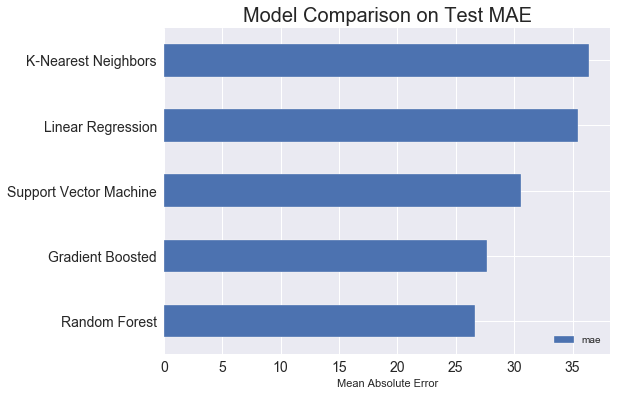

In [79]:
plt.style.use('seaborn')
figsize(8, 6)

# Model Comparison
model_comparison = pd.DataFrame({'model': ['Linear Regression', 
                                           'Random Forest', 
                                           'Gradient Boosted',
                                           'Support Vector Machine',                                            
                                            'K-Nearest Neighbors'],
                                 
                                 'mae': [lr_mae, 
                                         random_forest_mae, 
                                         gradient_boosted_mae,
                                         svm_mae,
                                         knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = True).plot(x = 'model', 
                                                           y = 'mae', 
                                                           kind = 'barh')

# Plot formatting
plt.ylabel('')
plt.yticks(size = 14)
plt.xlabel('Mean Absolute Error')
plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20)

Random Forest comes off as the best performing model, beating the baseline guess. 

This model can be further optimised using hyperparameter tuning. Hyperparameters can have a significant effect on final perfomance of a model. 

One of the ways to do hyperparameter tuning is through cross validation.

## Model Interpretation

There are two ways to look at how a model arrives to its predictions.
    1. Through feature importances
    2. Through LIME (Locally Interpretable Model-agnostic Explainer)

### Feature Importance

In [80]:
model_result = pd.DataFrame({'feature': list(train_features.columns), 
                             'importance':random_forest.feature_importances_})

# Most important features - 20
model_result = model_result.sort_values('importance', ascending = False).reset_index(drop=True)

model_result.head(20)

,feature,importance
0,accommodates,0.349182
1,bathrooms,0.090524
2,cleaning_fee,0.076420
3,calculated_host_listings_count_private_rooms,0.066779
4,longitude,0.066749
5,latitude,0.063591
6,host_id,0.032044
7,id,0.030002
8,availability_60,0.028241
9,security_deposit,0.023083


### LIME - Comparing best and worst predictions

In [81]:
#Random Forest
random_forest = RandomForestRegressor(random_state = 42)

# Train the model
random_forest.fit(X, y)
    
# Prediction
model_pred = random_forest.predict(X_test)

# Evaluation
model_mae = mae(y_test, model_pred)

C:\Users\Mwend\.conda\envs\Geo-Stuff\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [82]:
# Extract the names of the most important features
most_important_features = model_result['feature'][:20]

# Find the index that corresponds to each feature name
indices = [list(train_features.columns).index(x) for x in most_important_features]

# Keep only the most important features
X = X[:, indices]
X_test = X_test[:, indices]

print('Most important training features shape: ', X.shape)
print('Most important testing  features shape: ', X_test.shape)

Most important training features shape:  (57040, 20)
Most important testing  features shape:  (24446, 20)


In [83]:
#Residual 
residuals = abs(model_pred - y_test)

# Exact the worst and best prediction
wrong = X_test[np.argmax(residuals), :]
right = X_test[np.argmin(residuals), :]

# Lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X, 
                                                   mode = 'regression',
                                                   training_labels = y,
                                                   feature_names = list(most_important_features))

#### Best prediction

In [ ]:
right_exp.show_in_notebook(show_predicted_value=False)

#### Worst Prediction

In [ ]:
wrong_exp.show_in_notebook(show_predicted_value = False)

### Reference

https://nbviewer.jupyter.org/github/L-Lewis/Airbnb-neural-network-price-prediction/blob/master/Airbnb-price-prediction.ipynb#Categorical-features. Assessed on 27th November 2019

Hands-On Machine Learning with Scikit-Learn and Tensorflow by Aurelien Geron https://www.amazon.com/gp/product/1491962291/ref=ppx_yo_dt_b_asin_title_o02_s00?ie=UTF8&psc=1

Python Data Science Handbook by Jake VanderPlas
https://www.amazon.com/gp/product/1491912057/ref=ppx_yo_dt_b_asin_title_o04_s01?ie=UTF8&psc=1

Python for Data Analysis by Wes McKinney
https://www.amazon.com/gp/product/1491957662/ref=ppx_yo_dt_b_asin_title_o04_s01?ie=UTF8&psc=1

Feature Engineering for Machine Learning by Alice Zheng & Amamnda Casari
https://www.amazon.com/gp/product/1491953241/ref=ppx_yo_dt_b_asin_title_o03_s00?ie=UTF8&psc=1